In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/content/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


# **Scatter Plot**

*Linear scatter plot represents direct relationship between year and sea level. The sea level has been increasing over the years*

Text(0.5, 1.0, 'Sea Level over the year')

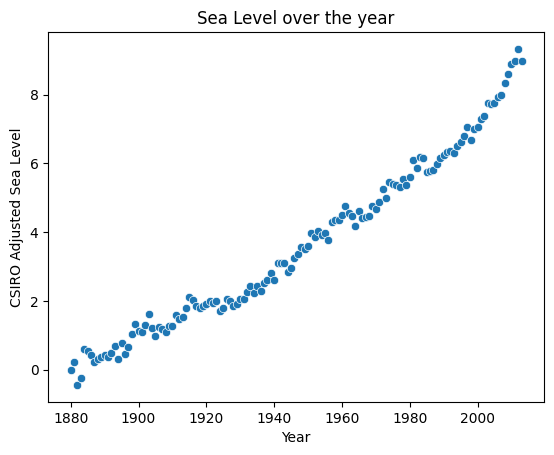

In [29]:
sns.scatterplot(x = 'Year',
                y = 'CSIRO Adjusted Sea Level',
                data = df)
plt.title('Sea Level over the year')

## ***Using linear regression***


****

In [13]:
#Get the slope and intercept to plot the best fit line
# y = mx + c

result = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])


Text(0.5, 1.0, 'Scatter Plot with Best Fit Line')

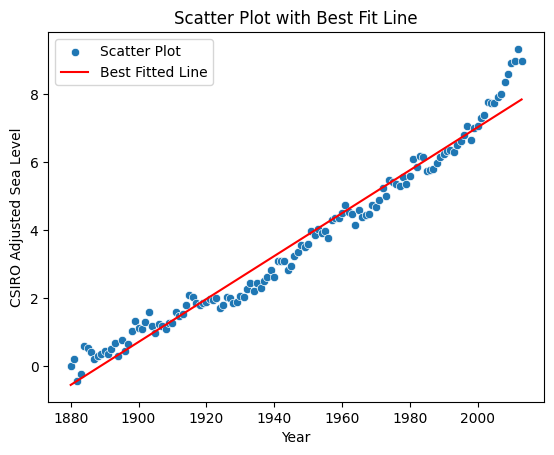

In [16]:
#Plot the scatter plot
sns.scatterplot(x = 'Year',
                y = 'CSIRO Adjusted Sea Level',
                data = df,
                label = 'Scatter Plot')

#Plot the best fit line
sns.lineplot(x = df['Year'],
             y = result.slope * df['Year'] + result.intercept,
             color = 'r',
             label = 'Best Fitted Line')

plt.title('Scatter Plot with Best Fit Line')


### **Prediction of Sea Level by 2050**

In [19]:
#Using the data after year 2000
df_pred = df[df['Year'] >= 2000]


#Get the slope and y intercept using scipy.stats.linregress method
result_pred = stats.linregress(df_pred['Year'], df_pred['CSIRO Adjusted Sea Level'])

In [26]:
#Create a numpy array of years (2000 - 2050)
x_year = np.arange(2000, 2051)

#Calculate the sea level using the slope and y-intercept calculated using linear regression
y_result = result_pred.slope * x_year + result_pred.intercept

Text(0.5, 1.0, 'Rise in Sea Level by 2050')

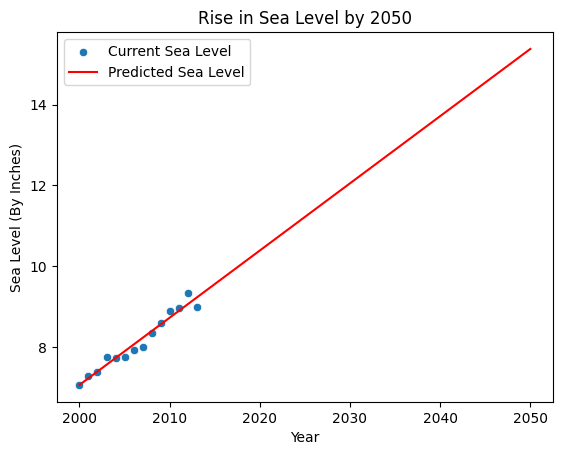

In [30]:
#Plot the scatterplot of existing data
sns.scatterplot(x = df_pred['Year'],
                y = df_pred['CSIRO Adjusted Sea Level'],
                data = df_pred,
                label = 'Current Sea Level')

#Plot the predicted data using linear regression
sns.lineplot(x = x_year,
             y = y_result,
             color = 'r',
             label = 'Predicted Sea Level')

plt.xlabel('Year')
plt.ylabel('Sea Level (By Inches)')
plt.title('Rise in Sea Level by 2050')